This Notebook will plot some histograms for data gathered from Mastodon instances.

Firstly, we load all the data that was previously gathered from all Mastodon instances. If your file path differs, you need to change it down below.

In [1]:
filepath='../data/nodes_data_mastodon_py'

In [2]:
from fediverse_analysis.instance_data import analyze

try:
    with open(filepath, 'r') as file:
        an = analyze.Analyzer(file)
except Exception as e:
    print(e)
    exit(1)
data = an.data

Total number of instances: 22190
Removed for (partially) no data: 12424
Removed for invalid data: 2
Remaining: 9764


Now you may choose a statistic and print it.

weekly_registrations_per_user


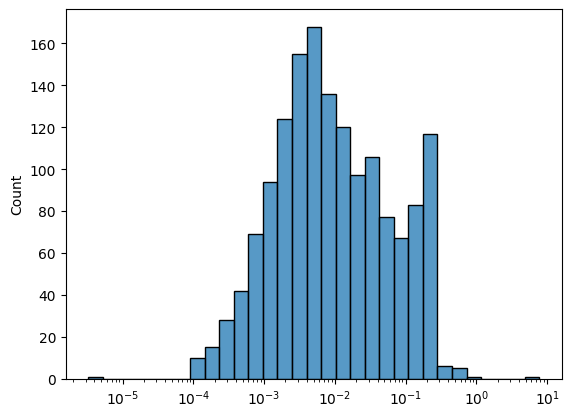

In [3]:
import seaborn as sns

available_stats = [an.TOTAL_USERS, an.MONTHLY_USERS, an.TOTAL_STATUSES, an.WEEKLY_STATUSES, an.WEEKLY_LOGINS,
                   an.WEEKLY_REGS, an.WEEKLY_STATUSES_PU, an.WEEKLY_LOGINS_PU, an.WEEKLY_REGS_PU]

stat = available_stats[-1]

print(stat)
plot = sns.histplot(data=data[stat], log_scale=True)